In [1]:
#Read all the csv files and compare the results in the results folder
#The results folder contains the results of the different models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#Read the csv files
path = 'results/Rwanda/'

all_files = glob.glob(os.path.join(path, "*.csv"))

all_files = sorted(all_files)

#Read the csv files and generate multiple dataframes
df_from_each_file = (pd.read_csv(f) for f in all_files)

df_analysis_list = []
for df in df_from_each_file:
    df_analysis_list.append(df)

In [2]:
results_df = pd.DataFrame(columns=['filename', 'iou', 'p_50', 'r_50', 'mAP_50', 'p_70', 'r_70', 'mAP_70', 'p_90', 'r_90', 'mAP_90'])

In [3]:
def calculate_AP(precision, recall):
    mrec = np.concatenate(([0.], recall, [1.]))
    mpre = np.concatenate(([0.], precision, [0.]))
    
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    i = np.where(mrec[1:] != mrec[:-1])[0]
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

def calculate_mAP(precision_list, recall_list):
    ap_list = [calculate_AP([precision], [recall]) for precision, recall in zip(precision_list, recall_list)]
    return np.mean(ap_list)

In [4]:
for i, df in enumerate(df_analysis_list):
    results_df.loc[i] = [all_files[i][:-4], df['mean_iou'].mean(), df['p_50'].mean(), df['r_50'].mean(), calculate_mAP(df['p_50'], df['r_50']), df['p_70'].mean(), df['r_70'].mean(), calculate_mAP(df['p_70'], df['r_70']), df['p_90'].mean(), df['r_90'].mean(), calculate_mAP(df['p_90'], df['r_90'])]

In [5]:
results_df

,filename,iou,p_50,r_50,mAP_50,p_70,r_70,mAP_70,p_90,r_90,mAP_90
0,results/Rwanda/MASKRCNN_Rwanda,0.232105,0.202105,0.157474,0.049763,0.030632,0.031474,0.005080,0.000000,0.000000,0.000000
1,results/Rwanda/SAM_Rwanda,0.302500,0.082826,0.289022,0.033170,0.061413,0.211087,0.020172,0.014239,0.065326,0.002595
2,results/Rwanda/SAT-SAM_Rwanda,0.270972,0.284722,0.122917,0.056946,0.232222,0.104167,0.041856,0.047639,0.023611,0.003850


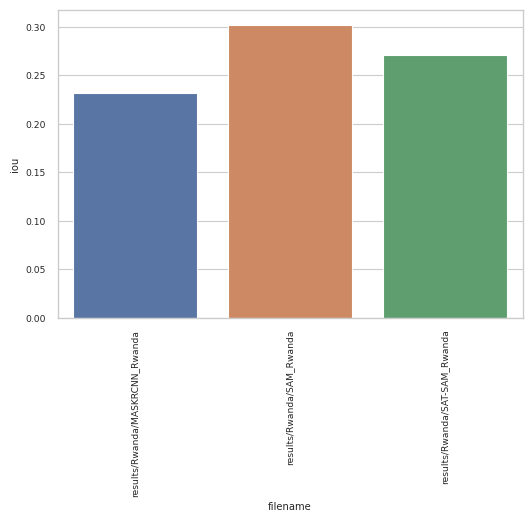

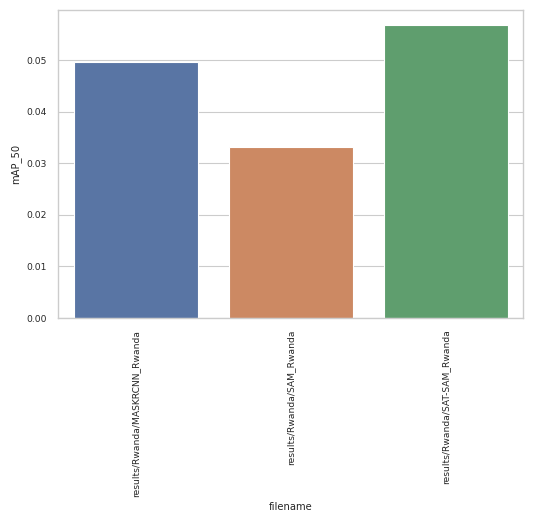

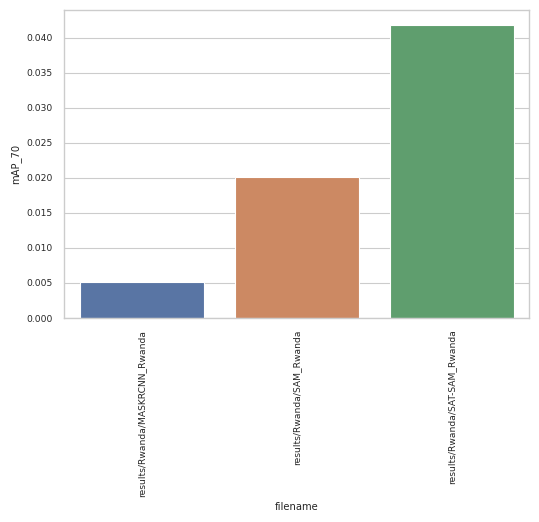

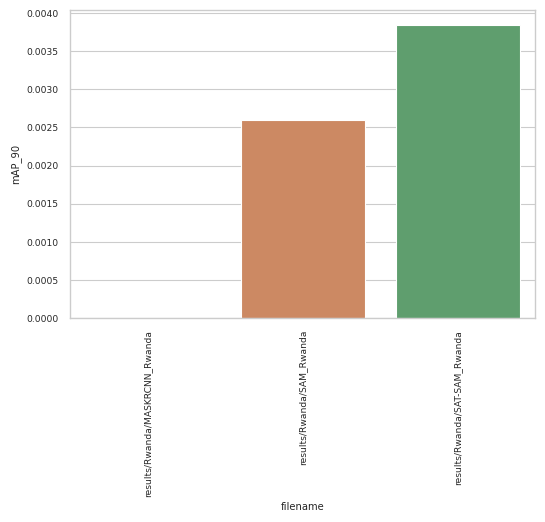

In [6]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=0.75)
#Plot bar chart for results_df dataframe for each column separately
for col in results_df.columns:
    if col == 'filename' or col == 'p_50' or col == 'r_50' or col == 'p_70' or col == 'r_70' or col == 'p_90' or col == 'r_90' :
        continue
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x="filename", y=col, data=results_df)
    plt.xticks(rotation=90)
    plt.show()